In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, Input, concatenate
from tensorflow.keras.models import Sequential, load_model, Model
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
# from keras.utils import to_categorical
from sklearn import metrics
import h5py
from sklearn import utils
from tensorflow.keras.backend import clear_session
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

## Training history 0% contamination

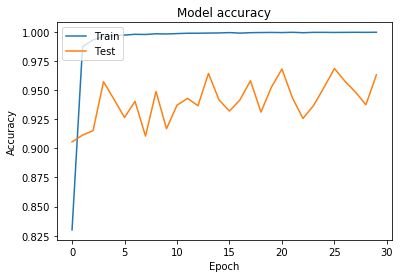

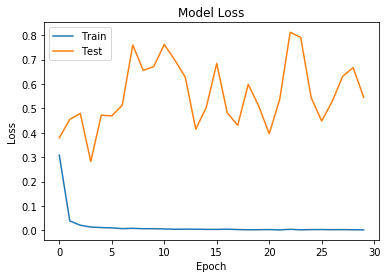

In [2]:
history = h5py.File('savio_nets/rcnnV1_again_chirality_classification_00pwrongleftrightlabels_history_20200821.h5','r')

list(history.keys())

plt.plot(history['acc'][:])
plt.plot(history['val_acc'][:])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Training history 5% contamination

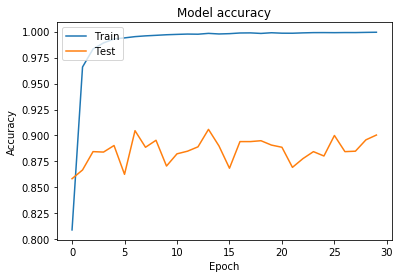

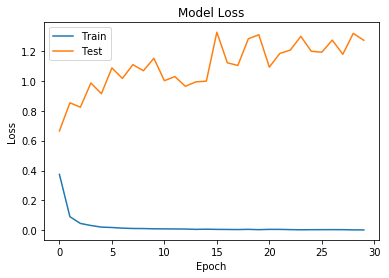

In [40]:
history = h5py.File('savio_nets/rcnnV1_again_chirality_classification_05pwrongleftrightlabels_history_20200821.h5','r')

list(history.keys())

plt.plot(history['acc'][:])
plt.plot(history['val_acc'][:])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Training history 10% contamination

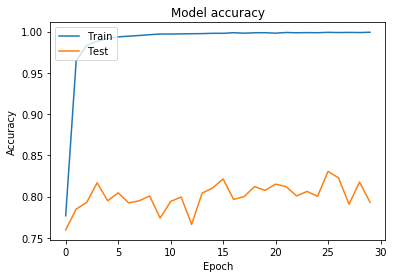

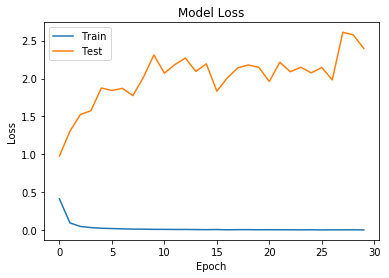

In [41]:
history = h5py.File('savio_nets/rcnnV1_again_chirality_classification_10pwrongleftrightlabels_history_20200821.h5','r')

list(history.keys())

plt.plot(history['acc'][:])
plt.plot(history['val_acc'][:])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Training history 20% contamination

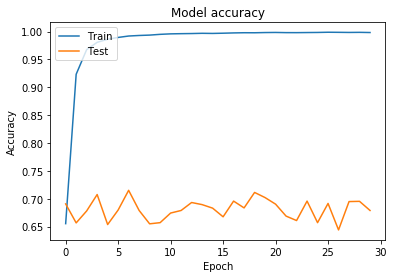

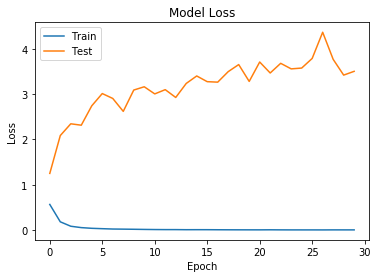

In [39]:
history = h5py.File('savio_nets/rcnnV1_again_chirality_classification_20pwrongleftrightlabels_history_20200821.h5','r')

list(history.keys())

plt.plot(history['acc'][:])
plt.plot(history['val_acc'][:])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Testing Nets on Validation Set

In [6]:
X_val_shuff = np.load('Te_X_val_shuff_20200820.npy')
Y_val_shuff = np.load('Te_Y_val_shuff_20200820.npy')

In [43]:
def down(filters, input_):
    down_ = Conv2D(filters, (3, 3))(input_)
    down_res = Activation('relu')(down_)
    down_pool = MaxPooling2D((2, 2))(down_)
    return down_pool

def first_final_stack(input_):
    flat = Flatten()(input_)
    dense1 = Dense(64)(flat)
    act1 = Activation('relu')(dense1)
    drop = Dropout(0.5)(act1)
    dense2 = Dense(2)(drop)
    act2 = Activation('softmax')(dense2)
    return act2


def sub_final_stack(input_,previous_pred):
    flat = Flatten()(input_)
    dense1 = Dense(64)(flat)
    act1 = Activation('relu')(dense1)
    drop = Dropout(0.5)(act1)
    dense2 = Dense(2)(drop)
    concat = concatenate([dense2,previous_pred])
    dense3 = Dense(2)(concat)
    act2 = Activation('softmax')(dense3)
    return act2

def sub_cnn(input_, previous_pred):
    down1 = down(32,input_)
    down2 = down(32,down1)
    down3 = down(64,down2)
    down4 = down(64,down3)
    down5 = down(64,down4)
    final = sub_final_stack(down5,previous_pred)
    return final

def first_cnn(input_):
    down1 = down(32,input_)
    down2 = down(32,down1)
    down3 = down(64,down2)
    down4 = down(64,down3)
    down5 = down(64,down4)
    final = first_final_stack(down5)
    return final

def complete_model(input_shape):
    input1 = Input(shape=input_shape)
    final1 = first_cnn(input1)
    final2 = sub_cnn(input1,final1)
    final3 = sub_cnn(input1,final2)
    model = Model(inputs=input1, outputs=final3)
    return model

model = complete_model((128, 128,1))


## 20% contamination net on clean validation data

In [20]:
model.load_weights('savio_nets/rcnnV1_again_chirality_classification_20pwrongleftrightlabels_weights_20200821.h5')

In [30]:
model.compile(loss='categorical_crossentropy',
              optimizer='Adadelta',
              metrics=['accuracy'])

In [23]:
model.evaluate(X_val_shuff,Y_val_shuff)

7/7 [==============================] - 1s 110ms/step - loss: 1.2564 - accuracy: 0.8969


[1.25636625289917, 0.8969072103500366]

In [26]:
del model

In [27]:
clear_session

<function tensorflow.python.keras.backend.clear_session()>

## 10% contamination net on clean validation data

In [31]:
model.load_weights('savio_nets/rcnnV1_again_chirality_classification_10pwrongleftrightlabels_weights_20200821.h5')

In [32]:
model.evaluate(X_val_shuff,Y_val_shuff)

7/7 [==============================] - 1s 115ms/step - loss: 1.5756 - accuracy: 0.8969


[1.575588583946228, 0.8969072103500366]

In [33]:
del model

clear_session

<function tensorflow.python.keras.backend.clear_session()>

## 5% contamination net on clean validation data

In [37]:
model.load_weights('savio_nets/rcnnV1_again_chirality_classification_05pwrongleftrightlabels_weights_20200821.h5')

In [36]:
model.compile(loss='categorical_crossentropy',
              optimizer='Adadelta',
              metrics=['accuracy'])

In [38]:
model.evaluate(X_val_shuff,Y_val_shuff)

7/7 [==============================] - 1s 114ms/step - loss: 1.0855 - accuracy: 0.9227


[1.0855408906936646, 0.9226804375648499]

In [42]:
del model

clear_session

<function tensorflow.python.keras.backend.clear_session()>

## 0% contamination net on clean validation data

In [44]:
model.load_weights('savio_nets/rcnnV1_again_chirality_classification_00pwrongleftrightlabels_weights_20200821.h5')

In [45]:
model.compile(loss='categorical_crossentropy',
              optimizer='Adadelta',
              metrics=['accuracy'])

In [46]:
model.evaluate(X_val_shuff,Y_val_shuff)

7/7 [==============================] - 1s 118ms/step - loss: 0.4213 - accuracy: 0.9639


[0.4212673306465149, 0.9639175534248352]